 Data cleaning and modelling

• Provide an environment (Database if possible) to connect Tableau to

• Answer the following questions

• What Categories/Subcategories are projected to grow the fastest in the next 5 years?

• Within these Categories/Subcategories, what Channels are growing?

• What is Dragonyte’s market position within these fast-growing categories?

• Provide predictions + explanation of the model used

• Give your recommendations to the Dragonyte Board

• Think out of the box! Dare to surprise!

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import sklearn
from sklearn.feature_selection import RFE


In [136]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)


In [137]:
#Market size TAM SAM
df = pd.read_csv('Data/Market_Sizes.csv')

In [138]:
subcategories = pd.read_csv('Data/Subcategories.csv')

In [139]:
df.head()

,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [140]:
df['Subcategory'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
1216    17
1217    17
1218    17
1219    17
1220    17
Name: Subcategory, Length: 1221, dtype: int64>

In [141]:
df = pd.merge(subcategories, df, left_on='id', right_on='Subcategory', suffixes=('SUBC', '_DF'))


In [142]:
df['Category'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1216    5
1217    5
1218    5
1219    5
1220    5
Name: Category, Length: 1221, dtype: int64>

In [143]:
df.shape

(1221, 18)

In [144]:
df.isnull().sum()

id                     0
Category               0
Name                   0
Location               0
Industry               0
Subcategory            0
Hierarchy_Level        0
Data_Type              0
Unit                   0
Current_Constant       0
Currency_Conversion    0
Year                   0
Year_date              0
RSP                    0
Volume                 0
Year_minus_2016        0
Year_minus_2022        0
Edition                0
dtype: int64

In [145]:
print(df.dtypes)


id                       int64
Category                 int64
Name                    object
Location                 int64
Industry                object
Subcategory              int64
Hierarchy_Level          int64
Data_Type               object
Unit                    object
Current_Constant        object
Currency_Conversion     object
Year                     int64
Year_date               object
RSP                    float64
Volume                 float64
Year_minus_2016          int64
Year_minus_2022          int64
Edition                  int64
dtype: object


In [146]:
df['Unit'].unique()


array(['USD million'], dtype=object)

In [147]:
df.drop_duplicates(inplace=True)


In [148]:
df['Data_Type'].unique

<bound method Series.unique of 0       Total Value RSP
1       Total Value RSP
2       Total Value RSP
3       Total Value RSP
4       Total Value RSP
             ...       
1216    Total Value RSP
1217    Total Value RSP
1218    Total Value RSP
1219    Total Value RSP
1220    Total Value RSP
Name: Data_Type, Length: 1221, dtype: object>

In [149]:
df.head()

,id,Category,Name,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [150]:
df = df.drop(['Year_minus_2022','Year_minus_2016','Edition','Current_Constant','Currency_Conversion','Unit','Data_Type','Year_date', 'Subcategory','id','Hierarchy_Level'], axis=1)

In [151]:
numerical=df.select_dtypes(include=np.number)
numerical.shape

(1221, 5)

In [152]:
categorical = df.select_dtypes(include=['object', 'category'])
categorical.shape

(1221, 2)

In [153]:
df.columns

Index(['Category', 'Name', 'Location', 'Industry', 'Year', 'RSP', 'Volume'], dtype='object')

<Axes: >

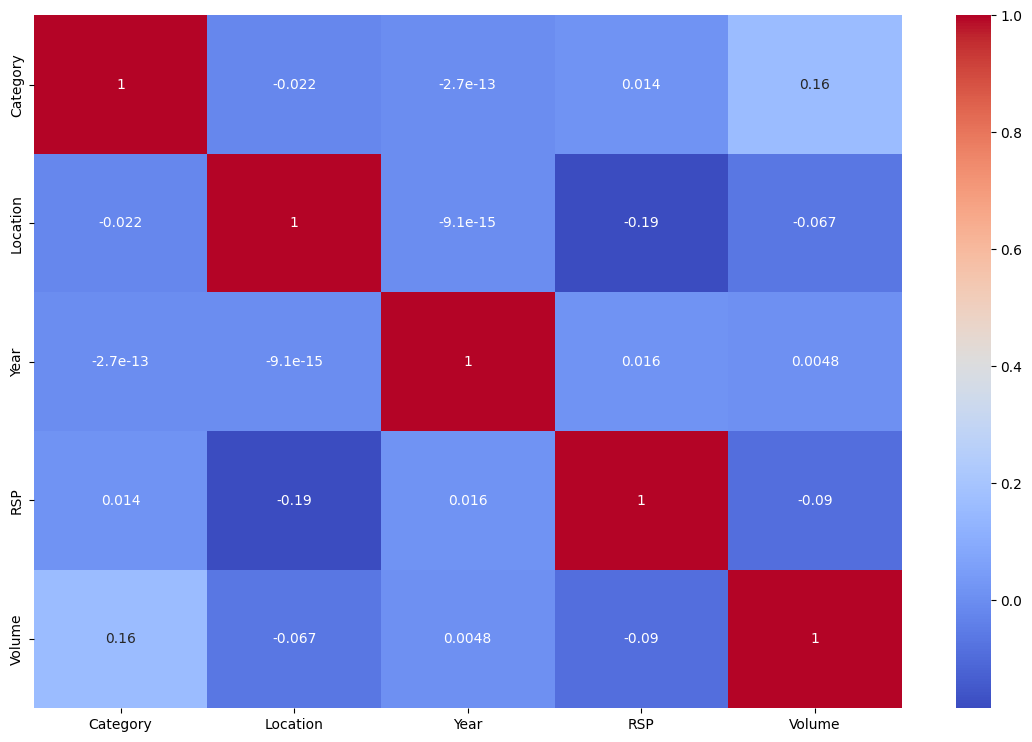

In [154]:
corr = numerical.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [155]:
df.columns

Index(['Category', 'Name', 'Location', 'Industry', 'Year', 'RSP', 'Volume'], dtype='object')

In [156]:
df.head()

,Category,Name,Location,Industry,Year,RSP,Volume
0,1,Ale,1,Alcoholic Drinks,2016,301.00,27.00
1,1,Ale,1,Alcoholic Drinks,2017,318.00,28.00
2,1,Ale,1,Alcoholic Drinks,2018,458.00,40.00
3,1,Ale,1,Alcoholic Drinks,2019,612.00,51.00
4,1,Ale,1,Alcoholic Drinks,2020,774.00,62.00


In [157]:
X = numerical.drop("Category",axis=1)   #Feature Matrix
y = numerical["Category"] 

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((854, 4), (367, 4))

ExtraTreesRegressor

In [159]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [160]:
print(model.feature_importances_)


[0.21046565 0.08822963 0.30670787 0.39459684]


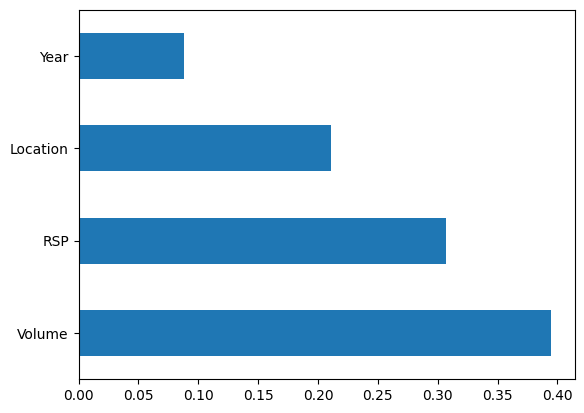

In [161]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [162]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [163]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


Mutual_info_Regression

In [164]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00768779, 0.        , 0.26276852, 0.33849531])

In [165]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Volume     0.34
RSP        0.26
Location   0.01
Year       0.00
dtype: float64

<Axes: >

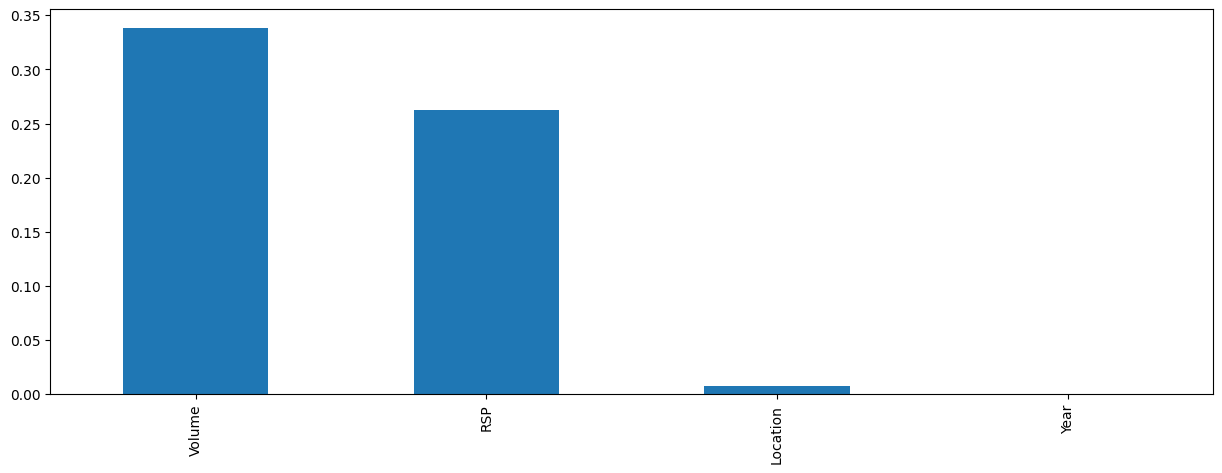

In [166]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [167]:
from sklearn.feature_selection import SelectPercentile


## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x15a553740>)

In [168]:
selected_top_columns.get_support()
X_train.columns[selected_top_columns.get_support()]


Index(['Volume'], dtype='object')

In [169]:
df

,Category,Name,Location,Industry,Year,RSP,Volume
0,1,Ale,1,Alcoholic Drinks,2016,301.00,27.00
1,1,Ale,1,Alcoholic Drinks,2017,318.00,28.00
2,1,Ale,1,Alcoholic Drinks,2018,458.00,40.00
3,1,Ale,1,Alcoholic Drinks,2019,612.00,51.00
4,1,Ale,1,Alcoholic Drinks,2020,774.00,62.00
...,...,...,...,...,...,...,...
1216,5,Cider/Perry,7,Alcoholic Drinks,2022,6.54,1.20
1217,5,Cider/Perry,7,Alcoholic Drinks,2023,6.63,1.21
1218,5,Cider/Perry,7,Alcoholic Drinks,2024,6.71,1.23
1219,5,Cider/Perry,7,Alcoholic Drinks,2025,6.79,1.24


In [170]:
empty = df['Year'] == '2021'

In [171]:
empty

0       False
1       False
2       False
3       False
4       False
        ...  
1216    False
1217    False
1218    False
1219    False
1220    False
Name: Year, Length: 1221, dtype: bool

<Axes: xlabel='RSP', ylabel='Year'>

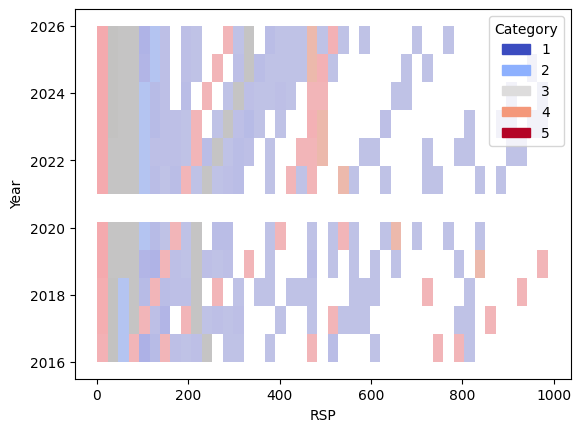

In [172]:
sns.histplot(df, x = "RSP", y = "Year", hue = 'Category',  palette="coolwarm")

<Axes: xlabel='Year', ylabel='RSP'>

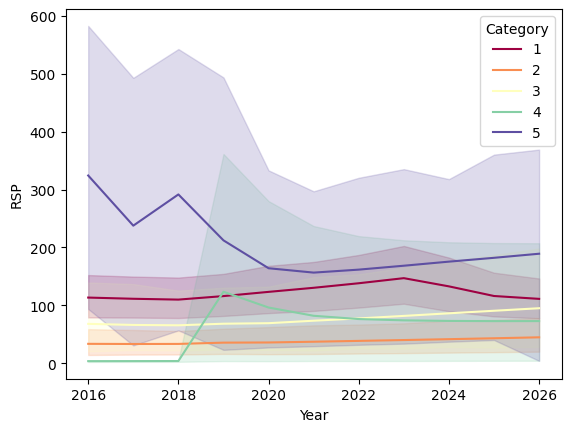

In [173]:

sns.lineplot(df, x = "Year", y = "RSP", hue = 'Category',  palette="Spectral")

In [174]:
subcategories

,id,Category,Name
0,1,1,Ale
1,2,1,Weissbier/Weizen/Wheat Beer
2,3,1,Flavoured/Mixed Lager
3,4,1,Standard Lager
4,5,1,Sorghum
5,6,1,Stout
6,7,1,Non Alcoholic Beer
7,8,1,Lager
8,9,1,Dark Beer
9,10,1,Premium Lager


In [175]:
X_train

,Location,Year,RSP,Volume
1148,1,2020,177.00,14.00
188,4,2017,197.00,62.00
491,2,2023,14.84,1.89
1220,7,2026,6.89,1.26
474,1,2017,152.80,70.12
...,...,...,...,...
763,6,2020,39.17,11.20
835,5,2026,2.14,1.57
1216,7,2022,6.54,1.20
559,1,2025,10.39,914.00


In [176]:
y_train

1148    5
188     1
491     1
1220    5
474     1
       ..
763     1
835     1
1216    5
559     1
684     1
Name: Category, Length: 854, dtype: int64

XGBOOST

In [177]:
import xgboost as xgb

s  = xgb.XGBRegressor(base_score = 0.5,
                        booster = "gbtree",
                        objective = 'reg:squarederror',
                        max_depth = 5,
                        learning_rate = 0.05
                        )

s.fit(X_train, y_train,
        eval_set = [(X_train, y_train)],
        verbose = 100
        )

[0]	validation_0-rmse:1.54178


[99]	validation_0-rmse:0.41326


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [178]:
s.score(X_train, y_train)

0.8783396796115905

In [179]:
s.score(X_test, y_test)

0.6269779194376252

In [180]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [181]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [182]:
# Create an XGBRegressor object with the best hyperparameters
regressor = xgb.XGBRegressor(**best_params)

# Fit the model on the training data
regressor.fit(X_train, y_train,
      eval_set=[(X_train, y_train)],
      verbose=100
      )


[0]	validation_0-rmse:1.48210


[100]	validation_0-rmse:0.07865
[200]	validation_0-rmse:0.02054
[299]	validation_0-rmse:0.00793


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [183]:
regressor.score(X_train, y_train)

0.999955213528771

In [184]:
regressor.score(X_test, y_test)

0.6867904699428937

RANDOM FOREST

In [185]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[4,6],
    "max_depth":[None,4,8],
    "max_features":[8,12,20]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [8, 12, 20],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [186]:
train_score = best_model.score(X_train, y_train)
print("Training score:", train_score)


Training score: 0.999955213528771


In [187]:
best_forest.score(X_train, y_train)

0.9415902230983592

In [188]:
best_forest.score(X_test, y_test)

0.6895512782411353

In [189]:
best_forest = grid_search.best_estimator_
feature_importances = best_forest.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")


Location: 0.18415822642008722
Year: 0.0448876754516911
RSP: 0.31742375928280847
Volume: 0.4535303388454132


In [190]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 12,
 'min_samples_split': 4,
 'n_estimators': 300}

LinearRegression

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train) 


reg = LinearRegression()

reg.fit(X_train_s, y_train)

reg.score(X_train_s, y_train)

0.029269487428278063

In [192]:
X_test_s = scaler.transform(X_test) 
reg.score(X_test_s, y_test)

0.011749550501005568

In [193]:
df

,Category,Name,Location,Industry,Year,RSP,Volume
0,1,Ale,1,Alcoholic Drinks,2016,301.00,27.00
1,1,Ale,1,Alcoholic Drinks,2017,318.00,28.00
2,1,Ale,1,Alcoholic Drinks,2018,458.00,40.00
3,1,Ale,1,Alcoholic Drinks,2019,612.00,51.00
4,1,Ale,1,Alcoholic Drinks,2020,774.00,62.00
...,...,...,...,...,...,...,...
1216,5,Cider/Perry,7,Alcoholic Drinks,2022,6.54,1.20
1217,5,Cider/Perry,7,Alcoholic Drinks,2023,6.63,1.21
1218,5,Cider/Perry,7,Alcoholic Drinks,2024,6.71,1.23
1219,5,Cider/Perry,7,Alcoholic Drinks,2025,6.79,1.24
